In [1]:
#%% Importar librerias
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de datos

In [2]:
df_titanic = pd.read_csv('Titanic.csv')

df_titanic = df_titanic.drop(columns = 'PassengerId')

print(f"Las columnas son {df_titanic.columns}")
print(f"Las forma es {df_titanic.shape}")
print(f"Los datos faltantes son {df_titanic.isnull().sum()}")

Las columnas son Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Las forma es (891, 11)
Los datos faltantes son Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64


# Tratamiento de datos

Los datos faltantes son 

Age         177

Cabin       687

Embarked      2


29.69911764705882


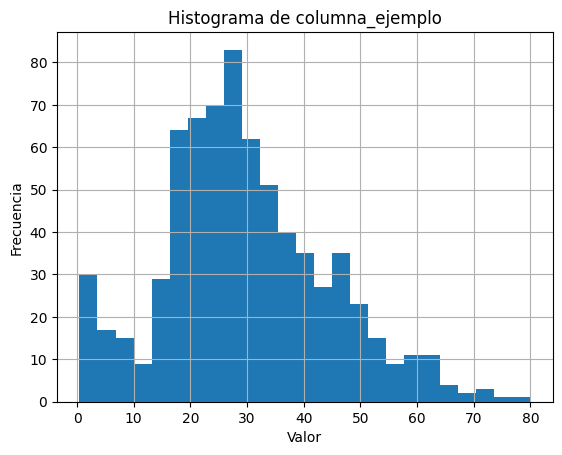

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']
0       0
1     C85
2       0
3    C123
4  

In [3]:
# Decisiones sobre los datos faltantes
print(np.mean(df_titanic['Age']))

df_titanic['Age'].hist(bins=25)  # bins define el número de barras en el histograma
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Histograma de columna_ejemplo')
plt.show()

#Toma valores de cabinas/habitaciones
print(df_titanic['Cabin'].unique())
#Rellenamos los valores con 0 para las cabinas NaN
df_titanic = df_titanic.fillna('0')
print(df_titanic['Cabin'].head(5))


# Embarked puede tomar 3 valores ['S' 'C' 'Q' nan] 
print(df_titanic['Embarked'].unique())
#Cambiamos los NaN por D de Desconocido
df_titanic = df_titanic['Embarked'].fillna('D')


# Analisis de componentes